In [1]:
import getpass
import cordra
from lucenequerybuilder import Q
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

# Cordra Host Information

In [2]:
host = "https://localhost"
obj_type = "debug"

# User Login Details

In [3]:
username = "testuser1"
password = getpass.getpass()

········


# Create two similar objects

In [4]:
file_1 = "example-data.csv"
payloads = {'p1': (file_1, open(file_1,'rb'))}

obj_1 = dict()
obj_1["name"] = "example 1"
obj_1["description"] = "an example of metadata for CSV payload"
obj_1["author"] = "John"

my_acl = dict()
my_acl["readers"] = ["public"]

response = cordra.Objects.create(
    host,
    obj_1,
    obj_type,
    username=username,
    password=password,
    verify=False,
    acls=my_acl,
    payloads=payloads)
response

{'id': 'test/c52d15c41c8d33609e64',
 'name': 'example 1',
 'description': 'an example of metadata for CSV payload',
 'author': 'John'}

In [5]:
file_2 = "example-data.csv"
payloads = {'p1': (file_2, open(file_2,'rb'))}

obj_2 = dict()
obj_2["name"] = "example 2"
obj_2["description"] = "another example of metadata for CSV payload"
obj_2["author"] = "Tim"

my_acl = dict()
my_acl["readers"] = ["public"]

response = cordra.Objects.create(
    host,
    obj_2,
    obj_type,
    username=username,
    password=password,
    verify=False,
    acls=my_acl,
    payloads=payloads)
response

{'id': 'test/f839b56d6dae689c33b2',
 'name': 'example 2',
 'description': 'another example of metadata for CSV payload',
 'author': 'Tim'}

# Query objects

## Full text query example

In [6]:
q = Q('metadata')
my_results = cordra.Objects.find(host,str(q),verify=False)
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 4,
 'results': [{'id': 'test/72b07e641d28b8b90ac7',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/abedafa7da73571f799d',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/c52d15c41c8d33609e64',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/f839b56d6dae689c33b2',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'}]}

## Field query examples

In [7]:
q = Q('/author','John')
my_results = cordra.Objects.find(host,str(q),verify=False)
obj_id_1 = my_results["results"][0]["id"]
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 2,
 'results': [{'id': 'test/72b07e641d28b8b90ac7',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/c52d15c41c8d33609e64',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'}]}

In [8]:
q = Q('/author','Tim')
my_results = cordra.Objects.find(host,str(q),verify=False)
obj_id_2 = my_results["results"][0]["id"]
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 2,
 'results': [{'id': 'test/abedafa7da73571f799d',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/f839b56d6dae689c33b2',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'}]}

# Read objects

In [9]:
obj_id_2

'test/abedafa7da73571f799d'

In [10]:
my_obj = cordra.Objects.read(host,obj_id_2,verify=False)
my_obj

{'id': 'test/abedafa7da73571f799d',
 'name': 'example 2',
 'description': 'another example of metadata for CSV payload',
 'author': 'Tim'}

In [11]:
my_obj = cordra.Objects.read(host,obj_id_2,verify=False,full=True)
my_obj

{'id': 'test/abedafa7da73571f799d',
 'type': 'debug',
 'content': {'id': 'test/abedafa7da73571f799d',
  'name': 'example 2',
  'description': 'another example of metadata for CSV payload',
  'author': 'Tim'},
 'acl': {'readers': ['public']},
 'metadata': {'createdOn': 1585165545682,
  'createdBy': 'test/af3ae12608ced0778915',
  'modifiedOn': 1585165545682,
  'modifiedBy': 'test/af3ae12608ced0778915',
  'txnId': 1585165545682015},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

In [12]:
obj_payload_name = my_obj["payloads"][0]["name"]
obj_payload_name

'p1'

In [13]:
payload = cordra.Objects.read_payload(host,obj_id_2,obj_payload_name,verify=False)
payload

'\ufeff"SAM0","SAM1"\r\n1.00,2.302389071\r\n2.00,3.71503899\r\n3.00,9.426125622\r\n4.00,11.34529125\r\n5.00,11.87704484\r\n6.00,19.01325695\r\n7.00,21.52353652\r\n8.00,28.28670056\r\n9.00,29.55737761\r\n10.00,25.89582707\r\n11.00,31.57982065\r\n12.00,36.02452105\r\n13.00,39.47686412\r\n14.00,44.41192202\r\n15.00,43.36098819\r\n16.00,48.61525381\r\n17.00,53.91222295\r\n18.00,54.28420278\r\n19.00,53.1378195\r\n20.00,55.88015939'

In [14]:
df = pd.read_csv(StringIO(payload))
df

,SAM0,SAM1
0,1.0,2.302389
1,2.0,3.715039
2,3.0,9.426126
3,4.0,11.345291
4,5.0,11.877045
5,6.0,19.013257
6,7.0,21.523537
7,8.0,28.286701
8,9.0,29.557378
9,10.0,25.895827


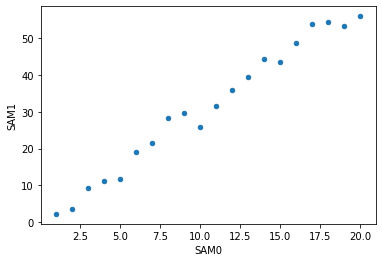

In [15]:
df.plot.scatter(x='SAM0', y='SAM1')
plt.show()

# Update Objects

This also demonstrates the use of "Dry Run". During a "Dry Run", Cordra not actually create/update the object. Cordra will return results as if object had been created/updated. 

## Update part of the object JSON

payloads not affected

In [16]:
response = cordra.Objects.update(
    host,
    obj_id_2,
    obj_json="I really need to write a better description for my data.",
    jsonPointer="/description",
    username=username,
    password=password,
    verify=False,
    dryRun=True,
    full=True)
response

{'id': 'test/abedafa7da73571f799d',
 'type': 'debug',
 'content': {'id': 'test/abedafa7da73571f799d',
  'name': 'example 2',
  'description': 'I really need to write a better description for my data.',
  'author': 'Tim'},
 'acl': {'readers': ['public']},
 'metadata': {'createdOn': 1585165545682,
  'createdBy': 'test/af3ae12608ced0778915',
  'modifiedOn': 1585165659979,
  'modifiedBy': 'test/af3ae12608ced0778915',
  'txnId': 1585165545682015},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

## Update all of the object JSON

payloads not affected

In [17]:
response = cordra.Objects.update(
    host,
    obj_id_2,
    obj_json={"SAM1":"Level of CXCR4 expression"},
    username=username,
    password=password,
    verify=False,
    dryRun=True,
    full=True)
response

{'id': 'test/abedafa7da73571f799d',
 'type': 'debug',
 'content': {'id': 'test/abedafa7da73571f799d',
  'SAM1': 'Level of CXCR4 expression'},
 'acl': {'readers': ['public']},
 'metadata': {'createdOn': 1585165545682,
  'createdBy': 'test/af3ae12608ced0778915',
  'modifiedOn': 1585165660016,
  'modifiedBy': 'test/af3ae12608ced0778915',
  'txnId': 1585165545682015},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

## Update just ACLs

payloads not affected

In [18]:
response = cordra.Objects.update(
    host,
    obj_id_2,
    acls={"readers":None,"writers":None},
    username=username,
    password=password,
    verify=False,
    full=True)
response

{}

In [19]:
# this should return a 401 error

my_obj = cordra.Objects.read(host,obj_id_2,verify=False,full=True)
my_obj

HTTPError: 401 Client Error: Unauthorized for url: https://localhost/objects/test/abedafa7da73571f799d?full=True

In [20]:
my_obj = cordra.Objects.read(host,obj_id_2,username=username,password=password,verify=False,full=True)
my_obj

{'id': 'test/abedafa7da73571f799d',
 'type': 'debug',
 'content': {'id': 'test/abedafa7da73571f799d',
  'name': 'example 2',
  'description': 'another example of metadata for CSV payload',
  'author': 'Tim'},
 'acl': {},
 'metadata': {'createdOn': 1585165545682,
  'createdBy': 'test/af3ae12608ced0778915',
  'modifiedOn': 1585165660068,
  'modifiedBy': 'test/af3ae12608ced0778915',
  'txnId': 1585165660057021},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

# Delete objects

In [21]:
response = cordra.Objects.delete(host,obj_id_1,username=username,password=password,verify=False)
response

{}

In [22]:
response = cordra.Objects.delete(host,obj_id_2,username=username,password=password,verify=False)
response

{}